In [1]:
import bigframes.pandas as bpd
import parse

In [2]:
df = bpd.from_glob_path("gs://garrettwu_bucket/images/*")
df

/usr/local/google/home/garrettwu/src/bigframes/bigframes/core/global_session.py:113: DefaultLocationWarning: No explicit location is set, so using location US for the session.
  return func(get_global_session(), *args, **kwargs)


,uri
0,gs://garrettwu_bucket/images/images.jpeg
1,gs://garrettwu_bucket/images/images (1).jpeg
2,gs://garrettwu_bucket/images/download.jpeg


In [3]:
df["rm_bg"] = df["uri"].blob.img_rm_background("img_rembg_output3")

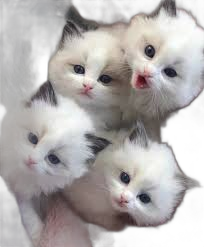

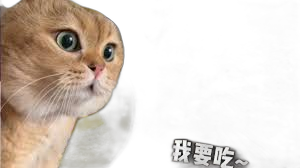

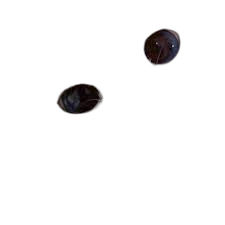

In [4]:
df["rm_bg"].blob.display()

In [5]:
from bigframes.ml import vision
model = vision.MultimodalEmbeddingGenerator()

In [6]:
result = model.predict(df["rm_bg"])
result

,ml_generate_embedding_result,ml_generate_embedding_status,ml_generate_embedding_start_sec,ml_generate_embedding_end_sec,uri,generation,content_type,size,md5_hash,updated,metadata
0,[-0.01475719 0.00594779 0.01300753 ... -0.00...,,<NA>,<NA>,gs://garrettwu_bucket/img_rembg_output3/images...,1725843354719980,image/png,87863,64cd8a8b0a4dd1991c88a18c00d7c1d8,2024-09-09 00:55:54.809000+00:00,[]
1,[-0.00687561 0.00139401 0.00997505 ... 0.01...,,<NA>,<NA>,gs://garrettwu_bucket/img_rembg_output3/images...,1725843353058844,image/png,65983,d33bb4c52cd2ef47f80a64c195f4b5ac,2024-09-09 00:55:53.140000+00:00,[]
2,[-0.00672765 -0.00396788 0.0246801 ... -0.03...,,<NA>,<NA>,gs://garrettwu_bucket/img_rembg_output3/downlo...,1725843351270752,image/png,7671,9611b6ccb983eccd53fda24797b4da52,2024-09-09 00:55:51.362000+00:00,[]


In [15]:
dst_folder = "img_rembg_output"


def parse_gcs_path(path):
    result = parse.parse("gs://{0}/{1}", path)

    return tuple(result)

@bpd.remote_function([str], str, packages=["google-cloud-storage", "rembg", "parse"], cloud_function_memory_mib=32768, reuse=False)
def garrettwu_test_rembg(uri_in):
    from rembg import remove
    from google.cloud import storage
    import parse
    import os

    storage_client = storage.Client()

    bucket_name, blob_path_in = parse_gcs_path(uri_in)
    bucket = storage_client.bucket(bucket_name)
    blob_in = bucket.blob(blob_path_in)
    bts = blob_in.download_as_bytes()

    bts = remove(bts)

    file_name = uri_in[uri_in.rfind("/") + 1 :]

    blob_path_out = os.path.join(dst_folder, file_name)
    blob_out = bucket.blob(blob_path_out)
    blob_out.upload_from_string(bts)

    return f"gs://{bucket_name}/{blob_path_out}"
    # return uri_in

In [9]:
df = bpd.DataFrame({"uri":["gs://garrettwu_bucket/img_rm_bg/bg_rm.png"]})

In [16]:
df["rm_bg"] = df["uri"].apply(garrettwu_test_rembg)

In [14]:
df

,uri,rm_bg
0,gs://garrettwu_bucket/img_rm_bg/bg_rm.png,gs://garrettwu_bucket/img_rembg_output/bg_rm.png


In [3]:
import bigframes.pandas as bpd
import parse

In [2]:
df = bpd.from_glob_path("gs://garrettwu_bucket/images/*")
df

/usr/local/google/home/garrettwu/src/bigframes/bigframes/core/global_session.py:113: DefaultLocationWarning: No explicit location is set, so using location US for the session.
  return func(get_global_session(), *args, **kwargs)


,uri
0,gs://garrettwu_bucket/images/images.jpeg
1,gs://garrettwu_bucket/images/images (1).jpeg
2,gs://garrettwu_bucket/images/download.jpeg


In [3]:
df["rm_bg"] = df["uri"].blob.img_rm_background("img_rembg_output1")

In [7]:
df["rm_bg"] = df["uri"].blob.img_rm_background("img_rembg_output2")

In [4]:
df

,uri,rm_bg
0,gs://garrettwu_bucket/images/images.jpeg,gs://garrettwu_bucket/img_rembg_output1/images...
1,gs://garrettwu_bucket/images/images (1).jpeg,gs://garrettwu_bucket/img_rembg_output1/images...
2,gs://garrettwu_bucket/images/download.jpeg,gs://garrettwu_bucket/img_rembg_output1/downlo...


In [5]:
df["rm_bg"].blob.display()

AttributeError: module 'bigframes.clients' has no attribute 'GcsManager'

In [2]:
import bigframes.pandas as bpd
df2 = bpd.from_glob_path("gs://garrettwu_bucket/images_kaggle/*")
df2

/usr/local/google/home/garrettwu/src/bigframes/bigframes/core/global_session.py:113: DefaultLocationWarning: No explicit location is set, so using location US for the session.
  return func(get_global_session(), *args, **kwargs)


,uri
0,gs://garrettwu_bucket/images_kaggle/cars/carsg...
1,gs://garrettwu_bucket/images_kaggle/cars/carsg...
2,gs://garrettwu_bucket/images_kaggle/cats/cat.4...
3,gs://garrettwu_bucket/images_kaggle/cats/cat.1...
4,gs://garrettwu_bucket/images_kaggle/human/ride...
5,gs://garrettwu_bucket/images_kaggle/horses/hor...
6,gs://garrettwu_bucket/images_kaggle/cars/carsg...
7,gs://garrettwu_bucket/images_kaggle/human/ride...
8,gs://garrettwu_bucket/images_kaggle/bike/bike_...
9,gs://garrettwu_bucket/images_kaggle/human/ride...


In [2]:
import bigframes.pandas as bpd
df = bpd.from_glob_path("gs://garrettwu_bucket/images_kaggle_10k/*")
df

,uri
0,gs://garrettwu_bucket/images_kaggle_10k/cat.13...
1,gs://garrettwu_bucket/images_kaggle_10k/dog.25...
2,gs://garrettwu_bucket/images_kaggle_10k/carsgr...
3,gs://garrettwu_bucket/images_kaggle_10k/horse-...
4,gs://garrettwu_bucket/images_kaggle_10k/cat.15...
5,gs://garrettwu_bucket/images_kaggle_10k/horse-...
6,gs://garrettwu_bucket/images_kaggle_10k/bike_3...
7,gs://garrettwu_bucket/images_kaggle_10k/carsgr...
8,gs://garrettwu_bucket/images_kaggle_10k/cat.13...
9,gs://garrettwu_bucket/images_kaggle_10k/dog.71...


In [ ]:
df["rm_bg"] = df["uri"].blob.img_rm_background("images_kaggle_10k_rm_bg")
df

In [3]:
import bigframes.pandas as bpd
df5 = bpd.from_glob_path("gs://garrettwu_bucket/images_kaggle_10k_rm_bg/*")
df5

,uri
0,gs://garrettwu_bucket/images_kaggle_10k_rm_bg/...
1,gs://garrettwu_bucket/images_kaggle_10k_rm_bg/...
2,gs://garrettwu_bucket/images_kaggle_10k_rm_bg/...
3,gs://garrettwu_bucket/images_kaggle_10k_rm_bg/...
4,gs://garrettwu_bucket/images_kaggle_10k_rm_bg/...
5,gs://garrettwu_bucket/images_kaggle_10k_rm_bg/...
6,gs://garrettwu_bucket/images_kaggle_10k_rm_bg/...
7,gs://garrettwu_bucket/images_kaggle_10k_rm_bg/...
8,gs://garrettwu_bucket/images_kaggle_10k_rm_bg/...
9,gs://garrettwu_bucket/images_kaggle_10k_rm_bg/...


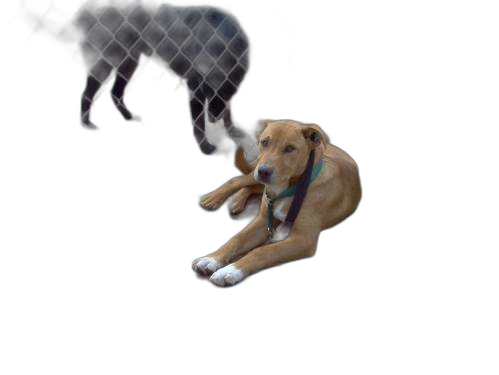

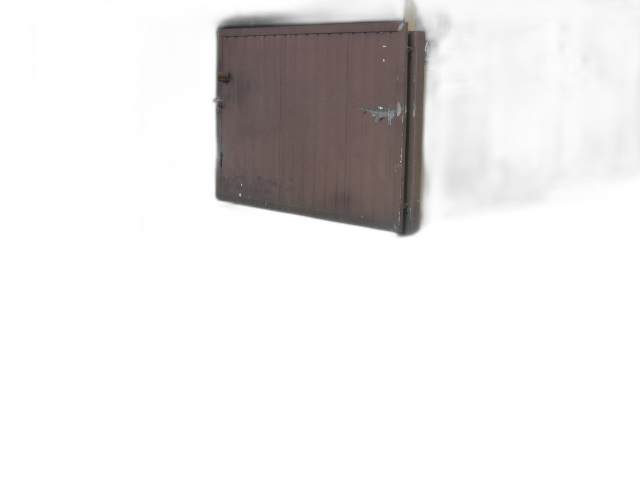

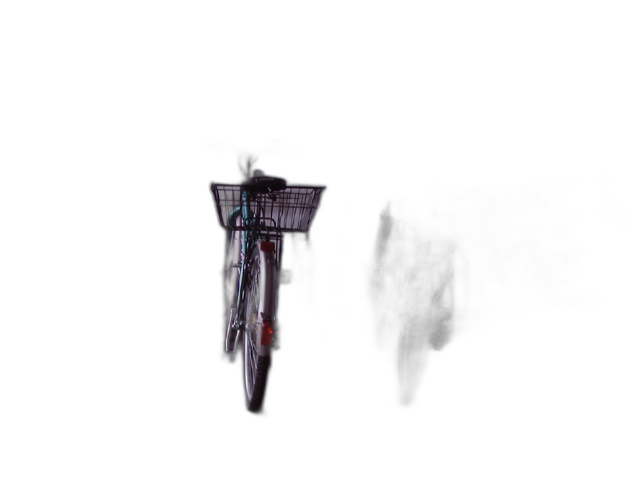

In [4]:
df5["uri"].blob.display()

In [5]:
from bigframes.ml import vision
model = vision.MultimodalEmbeddingGenerator()
result = model.predict(df5)
result

,ml_generate_embedding_result,ml_generate_embedding_status,ml_generate_embedding_start_sec,ml_generate_embedding_end_sec,uri,generation,content_type,size,md5_hash,updated,metadata
0,[],INVALID_ARGUMENT: Unsupported content type is ...,<NA>,<NA>,gs://garrettwu_bucket/images_kaggle_10k_rm_bg/...,1725835707416516,text/plain,38587,e8108601f074c910a64e14a26011c4bf,2024-09-08 22:48:27.469000+00:00,[]
1,[],INVALID_ARGUMENT: Unsupported content type is ...,<NA>,<NA>,gs://garrettwu_bucket/images_kaggle_10k_rm_bg/...,1725834945232993,text/plain,38231,45ec8a292ce4c1f50877810aa3364ebb,2024-09-08 22:35:45.285000+00:00,[]
2,[],INVALID_ARGUMENT: Unsupported content type is ...,<NA>,<NA>,gs://garrettwu_bucket/images_kaggle_10k_rm_bg/...,1725835370558345,text/plain,20067,924d8a30b722313fa8e345730d70e411,2024-09-08 22:42:50.591000+00:00,[]
3,[],INVALID_ARGUMENT: Unsupported content type is ...,<NA>,<NA>,gs://garrettwu_bucket/images_kaggle_10k_rm_bg/...,1725835754151795,text/plain,79876,4b74181bbcea438149bd647687e7e501,2024-09-08 22:49:14.184000+00:00,[]
4,[],INVALID_ARGUMENT: Unsupported content type is ...,<NA>,<NA>,gs://garrettwu_bucket/images_kaggle_10k_rm_bg/...,1725834762754073,text/plain,521821,69d4117d865feb179b65a1aee941a080,2024-09-08 22:32:42.922000+00:00,[]
5,[],INVALID_ARGUMENT: Unsupported content type is ...,<NA>,<NA>,gs://garrettwu_bucket/images_kaggle_10k_rm_bg/...,1725835370120297,text/plain,23487,6cc690a5fa36734c5cffa806302bd499,2024-09-08 22:42:50.152000+00:00,[]
6,[],INVALID_ARGUMENT: Unsupported content type is ...,<NA>,<NA>,gs://garrettwu_bucket/images_kaggle_10k_rm_bg/...,1725835730686993,text/plain,168774,c6de686c9152185c12168aa5dd02e43f,2024-09-08 22:48:50.731000+00:00,[]
7,[],INVALID_ARGUMENT: Unsupported content type is ...,<NA>,<NA>,gs://garrettwu_bucket/images_kaggle_10k_rm_bg/...,1725835564458653,text/plain,25612,33bd26b1f06a04cda5c37b255e2b99bd,2024-09-08 22:46:04.491000+00:00,[]
8,[],INVALID_ARGUMENT: Unsupported content type is ...,<NA>,<NA>,gs://garrettwu_bucket/images_kaggle_10k_rm_bg/...,1725834994816170,text/plain,17096,c4ad3f3f764e74a18ec2553f8ca29d92,2024-09-08 22:36:34.848000+00:00,[]
9,[],INVALID_ARGUMENT: Unsupported content type is ...,<NA>,<NA>,gs://garrettwu_bucket/images_kaggle_10k_rm_bg/...,1725835273904563,text/plain,34236,5fa56213614eb12bcf2e8568ce220e26,2024-09-08 22:41:13.937000+00:00,[]


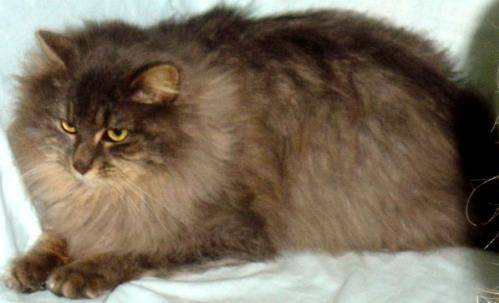

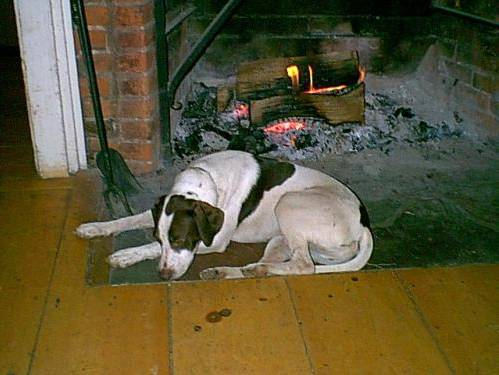

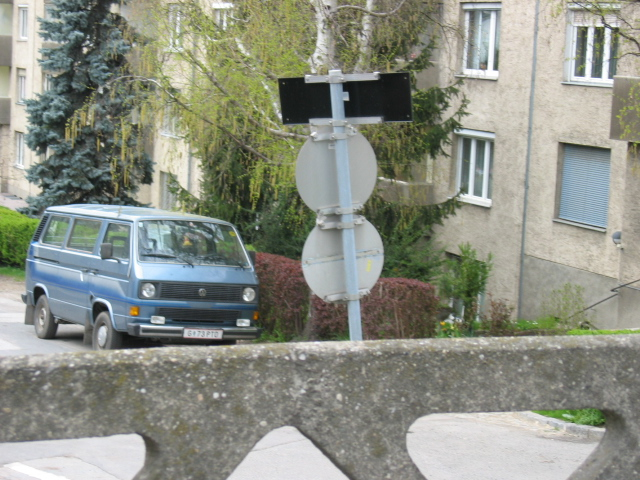

In [2]:
df4["uri"].blob.display()

In [3]:
df4["rm_bg"] = df4["uri"].blob.img_rm_background("images_kaggle_10k_rm_bg")

In [4]:
df4

,uri,rm_bg
0,gs://garrettwu_bucket/images_kaggle_10k/cat.13...,gs://garrettwu_bucket/images_kaggle_10k_rm_bg/...
1,gs://garrettwu_bucket/images_kaggle_10k/dog.25...,gs://garrettwu_bucket/images_kaggle_10k_rm_bg/...
2,gs://garrettwu_bucket/images_kaggle_10k/carsgr...,gs://garrettwu_bucket/images_kaggle_10k_rm_bg/...
3,gs://garrettwu_bucket/images_kaggle_10k/horse-...,gs://garrettwu_bucket/images_kaggle_10k_rm_bg/...
4,gs://garrettwu_bucket/images_kaggle_10k/cat.15...,gs://garrettwu_bucket/images_kaggle_10k_rm_bg/...
5,gs://garrettwu_bucket/images_kaggle_10k/horse-...,gs://garrettwu_bucket/images_kaggle_10k_rm_bg/...
6,gs://garrettwu_bucket/images_kaggle_10k/bike_3...,gs://garrettwu_bucket/images_kaggle_10k_rm_bg/...
7,gs://garrettwu_bucket/images_kaggle_10k/carsgr...,gs://garrettwu_bucket/images_kaggle_10k_rm_bg/...
8,gs://garrettwu_bucket/images_kaggle_10k/cat.13...,gs://garrettwu_bucket/images_kaggle_10k_rm_bg/...
9,gs://garrettwu_bucket/images_kaggle_10k/dog.71...,gs://garrettwu_bucket/images_kaggle_10k_rm_bg/...
